In [5]:
from IPython.core.display import display, HTML

### Frequentist Vs Bayesian

Frequentist
- Paramter $\theta$ is fixed and data $X$ is random.
- Model training is done using MLE principle, they try to find the parameter $\theta$ that try to maximize the likelihood of their data
    -  $\hat{\theta} = \underset{x}{\operatorname{argmax}}P(X|\theta)$

Bayesian 
- Paramter $\theta$ is random and data $X$ is fixed.
- Uses Bayes Rule, It computes the posterior, computes the probability of paramters given the data, a ratio between joint probability of X and $\theta$ and marginal probability of X, then applying the cahin rule gives us the formula mentioned below.
    - $P(\theta|X) = \frac{P(X|\theta)P(\theta)}{P(X)}$
    - $P(\theta|X)$ is Posterior Distr.
    - $P(X|\theta)$ is Likelihood
    - $P(\theta)$ is prior.
    - $P(X)$ is Evidence (the observed data).


### Bayesian Networks
Bayesian networks are used to define Probabilistic Graphical Models which are basically Joint probability distribution over the BN. BN are made up of nodes and edges, nodes being the random variable and edges being the direct impact between the nodes.
$$P(X_{1},X_{2},....,X_{n}) = \prod\limits_{k =1}^{n}P(X_{k}|Pa(X_{k}))$$
$Pa(X_{k})$ is the set of all parents to the node $X_{k}$ <br>, Eg.Pa(G) = {R,S} in example below

![title](./res/00_prob_graph.png)
$$P(S,R,G) = P(G|S,R)P(S|R)P(R)$$

Eg:- consider the eg:-Consider a alarm which alerts us whenever a thief comes for robbery, due to instrument sensitivity it also gives out alerts during an earthquake. Also consider earthquake alerts being given out by radio.
The representation is shown in the BN below

![title](./res/01_bayesian_analysis_thief_alarm.png)

Go to this link for solution to the problem :- 
https://docs.google.com/spreadsheets/d/1xKxpeEDnv9REQYLGhnciSKL8W8Dwtkk9-CgMN4FMVIU/edit?usp=sharing




### Parameter Estimation
Resources :- 
- https://towardsdatascience.com/the-truth-about-bayesian-priors-and-overfitting-84e24d3a1153
- https://towardsdatascience.com/probability-concepts-explained-bayesian-inference-for-parameter-estimation-90e8930e5348
- https://medium.com/@amatsukawa/maximum-likelihood-maximum-a-priori-and-bayesian-parameter-estimation-d99a23a0519f

We have already learned that there are two ways to find paramter estimates of a probability distribution. Point and Interval.
In this section we do a deep dive and look into doing parameter estimation using Bayesian inference.<br>

**Why bayes theorem is so powerful ?**<br>
Well, Simply because it helps us incorporate our prior beliefs/evidence/observarions etc. to better understand the task at hand.
Eg:- You have a coin. You flip it 4 times, it comes up heads all 4 times. What’s the probability of the coin coming up as heads for the next flip? This is a foundational machine learning problem of parameter estimation from data. In this case, we want to estimate the probability of heads h, from data D .
In bayes context it will be what is the probability of me seeing this paramter 'H' when i have the data that on all 4 consecutive tosses heads show up.Now,if i ask you what is 'the value of H' that would make this data more believable or that h is actually a parameter that defines the distribution followed by rv(rv's values being the data point)Yes, it is not 0.5 but rather 1.0. Simply because if h= 1.0 then data bein all heads makes sense right.

But we know thats not true for fair coins, P(H) = 0.5 = P(T) = P(~H).This is where bayesian reigns supreme




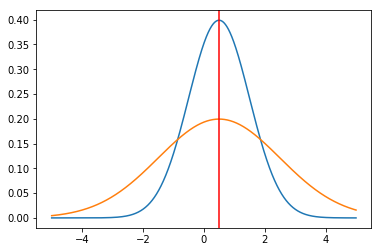

In [2]:
# Plot a normal distribution,
#Suppose that probability of H is not sure to be 0.5 but rather a distribution (the coin was later found to be biased)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Plot between -10 and 10 with .001 steps.
range = np.arange(-5, 5, 0.001)

plt.plot(range, norm.pdf(range, 0.5, 1.0))
plt.plot(range, norm.pdf(range, 0.5, 2.0))
plt.axvline(x = 0.5, color='red')

plt.show()

The above illustration was an example of priori distribution. What about posteriori ($P(\theta | data)$) ? This is the distribution representing our belief about the parameter values after we have calculated everything taking the observed data into account.<br>

There is only one link left to be made, the likelihood function $P(data|\theta)$ , it is basically the likelihood of seeing the evidence (the data sequence) given the info about paramter and its distribution we have.

Note that P(data) is more or less a normalizing factor and also it is a marginal probability of data, which makes it of no use in our paramter estimate journey.

Now when we have the posterior distribution for the parmater we can derive statistics from it.
For example, we could use the expected value of the distribution to estimate. Or we could calculate the variance to quantify our uncertainty about our conclusion. 

One of the most common statistics calculated from the posterior distribution is the mode. This is often used as the estimate of the true value for the parameter of interest and is known as the Maximum a posteriori probability estimate or simply, the MAP estimate. In the case the posterior distribution is a Gaussian distribution, the mean is equal to the mode (and the median).

Now the question arises **why in general do we always see normal distribution as our priors or likelihood distribution's pdf.** <br>
It makes maths easier, if we multiply a Gaussian prior distribution with a Gaussian likelihood function, We'll get a Gaussian posterior function. The fact that the posterior and prior are both from the same distribution family (they are both Gaussians) means that they are called conjugate distributions. In this case the prior distribution is known as a conjugate prior.

Sometimes this drama becomes too dramatic and in those cases wwe use MCMC to arrive at a posterior distribution.

**What happens when we get new data?**
We update the priors and they come out as posterior distribution which then beoomes our new prior.(EG: Kalman Filter).
http://www.bzarg.com/p/how-a-kalman-filter-works-in-pictures/

**Using Priors as Regularisers**
Yes, priors are used as regularisers when they have less spread than the corresponding likelihood function.

**MAP vs MLE**
Comparing both MLE and MAP equation, the only thing differs is the inclusion of prior in MAP, otherwise they are identical. What it means is that, the likelihood is now weighted with some weight coming from the prior.


Before leaving this blok,let me just explain briefly what do we mean by parameter of a model.
So parameters are those variables over which the model's function depends, they give meaning to the model's equation. Eg:- y = mx + c, In neural nets the W marix and bias vector are parameters for the large number of equation of a neural net connection.

### Maximum Likelihood
We know what paramters are we also know what models are? Then for whom we are trying to find out the maximum likelihood. Model generates the data using its equation, this data is what we observed as an output from model question is are their certain values of the parameters for which observed data makes more sense.
Eg:- In linear regression we use and try to find such combination of m,c such that the line best fits the data.

Let us understand it better, consider IPL final and RCB is there (:P) and powerplay is going on. We know how thrilling these matches are with batsmen hitting boundaries sixes every now and then, let us consider one such example.
In how much time do we see a boundary/six. (time being analogous to balls in an over here).

Now we should know which model we think best describes the process of generating the data.At the very least, we should have a good idea about which model to use. This usually comes from having some domain expertise and i am no "criket pundit" so i will choose my old friend the good old gaussian. It makes intutive sense to me to use it as i see that 
batsmen averages the boundary rate is centered around a number i.e every x ball batsmen hits a boundary/six.(roughly, a set batsmen ofcourse)(kill me for assuming this assumptions are much easier than trying to find out the distributions :P)

Gaussian distribution has 2 parameters. The mean, μ, and the standard deviation, σ. Different values of these parameters result in different curves (just like with the straight lines above). We want to know which curve was most likely responsible for creating the data points that we observed?


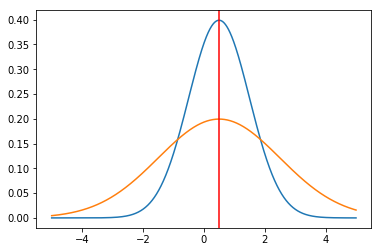

In [3]:
# Plot a normal distribution,
#Suppose that probability of H is not sure to be 0.5 but rather a distribution (the coin was later found to be biased)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Plot between -10 and 10 with .001 steps.
range = np.arange(-5, 5, 0.001)

plt.plot(range, norm.pdf(range, 0.5, 1.0))
plt.plot(range, norm.pdf(range, 0.5, 2.0))
plt.axvline(x = 0.5, color='red')

plt.show()

There are some assumptions that we need to follow to make calculating all the conditional and joint probabilities easier, the good part is that these are quite logical.
- Independent:- The data being observed is independent of each other, which is a fair assumption to make as If the events (i.e. the process that generates the data) are independent, then the total probability of observing all of data is the product of observing each data point individually (i.e. the product of the marginal probabilities) in this case it will be conditioned on the paramter we are trying to estimate. 
- Identically distributed :- it means that all the data observed are governed by $\mu$, $\sigma$ and not $\mu_{i}, \sigma_{i}$ for each independent data point $d_{i}$

Suppose we observe data as 3, 3, 5 (i.e. boundary hitting after 3 balls, then another 3 balls from there i.e. end of an over and so on)

$$ P(x; \mu, \sigma) = \frac{1}{{\sigma \sqrt {2\pi } }} e ^{\frac{ - \left( {x - \mu } \right)^2 }{2\sigma ^2 }} $$
For $D_{0}$
$$P(3; \mu, \sigma) = \frac{1}{{\sigma \sqrt {2\pi } }} e ^{\frac{ - \left( {3 - \mu } \right)^2 }{2\sigma ^2 }} $$

For $D_{1}$
$$P(3; \mu, \sigma) = \frac{1}{{\sigma \sqrt {2\pi } }} e ^{\frac{ - \left( {3 - \mu } \right)^2 }{2\sigma ^2 }} $$

For $D_{2}$
$$P(4; \mu, \sigma) = \frac{1}{{\sigma \sqrt {2\pi } }} e ^{\frac{ - \left( {3 - \mu } \right)^2 }{2\sigma ^2 }} $$

#Suppse we are only trying to estimate mean here and not sd. 
$P(D|\mu, \sigma) = P(3; \mu, \sigma) P(3; \mu, \sigma) P(4; \mu, \sigma)$
#Since log is a monotonic function, i.e. as we increase x y increases monotonically (in the same dirc), we can take log both side and we can still get value for $\mu$ for which the likelihood of observing the data is maximum

taking log and differentiating and equation to zero to get the value of paramter
$$\frac{d\frac{(3-\mu)^4)}{2\sigma^2}}{d\mu} + \frac{d\frac{(4-\mu)^2)}{2\sigma^2}}{d\mu} = 0$$
$$ 12- 4\mu + 8 - 2\mu = 0 $$
$$ 6\mu = 20 $$<br>
$$\mu = 3.33$$ Q.E.D


#But let us step back and take a look at problem at hand which is that this is a discrete variable,Wiki says :- The Poisson distribution is the discrete probability distribution of the number of events(boundaries) occurring in a given time period(powerplay or entire match), given the average number of times the event occurs over that time period(the boundary hitting rate or mean). WHY DID I MODEL IT AS NORMAL THEN?? because poisson tends to normal for larger means, let us try to find out the likelihood using poisson

$$P(d|\lambda) = \frac{(\lambda^d)e^-\lambda}{d!}$$

Likelihood of n observations from Poisson is then
$$P(d_1, d_2, d_3,....d_n|\lambda) = \prod_{i=1}^{n} \frac{(\lambda^{d_i})e^{-\lambda}}{d_i!} $$
$$ = \lambda^{\sum d_i}e^{-n \lambda} \prod_{i=1}^{n} \frac{1}{d_i!}$$
$$\propto (\sum d_i) log(\lambda) - n\lambda$$
taking derivative we get 
$$\lambda = \frac{\sum d_i}{n}$$
$$\lambda = 3.33$$

#### Shortcomings of MLE
1) The derative computation is not always as beautiful as it is hsown here, so to acheive that we use iterative methods like Expectation Maximization.

2)  The problem with MLE is that it is a point estimate, i.e., we are allowed to calculate the MLE at one particular value and this leads to overfitting, hence we always need a good amount of data to successfully estiamte the parameters


### Maximum a Posteriori

Now focus on this what i assumed in the example above is it hundered percent correct are all the batsmen in cricket scoring boundaries at the same rate, shouldn't we some kind of a decreasing exponent or a skewed gaussian or more like log normal ( as decreasing exponent is a very hard and impractical assumption) it means that as tail-ender comes out to bat the mean (boundary hitting frequncy) favours top hitting batsmen and it should have a good amount of variance(flatty normal curve) (even virat kohli is not consistent; oh wait is my assumption wrong :P )

**This is my prior belief**, A prior probability distribution, often simply called the prior, of an uncertain quantity is the probability distribution that would express one’s beliefs about this quantity before some evidence is taken into account.

MLE - Likelihood is the probability of data given the parameter, and we were maximizing this w.r.t. theta.
MAP — Maximizing the probability of theta after we have observed our data.
#### Terminology Gyan
- **Prior** is our belief in how theta looks like before we observed any data
- **Posterior** is our updated belief as to what theta looks like after we have observed some data.
- **Evidence** the data observed
- **Likelihood** the likelihood or probability of seeing the data when we have a paramter theta on which my data should actually be conditioned.

The point of the prior has to be chosen looking at observations, (it is the chosen one :p ) and this leaves room for all kind of model assumptions. There is no particular rule that prior needs to fulfill except that it needs to be a valid probability distribution. (the area under probability curve should be 1).

What i did above while explaining the prior is like an inductive biase (subjective assumptions). By introducing these subjective assumptions, we are biasing our analysis/model towards certain solutions. It’s something we must be aware of while writing down a model.

But what is everything is equally likely in my prior i.e. all the events have same probability or the distribution is uniform, MLE is a special case of MAP when prior is uniform.

Coming back to MLE, whenever we have a prior that has a similar functional form as the likelihood and they fit well together, we talk about so called Conjugate Priors. Why do we care simple because it now gives us the idea as to how our posterior will look like. a gaussian in our case. [Eg:- for a coin toss experiment, beta is a conjugate pair to bionomial]

Can you explain the conjugate pairs a bit more?
- A form of prior density, that results in the same form of density for the posterior is called conjugate pair.
- Posterior density depends on product of prior and data likelihood.
- The form of data likelihood depends on the form assumed for $f(x|\theta)$
- **Hence the conjugate prior is determined by the form of $f(x|\theta)$ i.e. of the data likelihood.**
- When we use conjugate pairs, the prior and posterior would belong to the same class of densities.
- Hence calculating posterior would be like updating parameter values.
- Our assumptions can quickly become unrealistic in a real setting, but that is the cost we pay for easy maths avoiding all the samping from posterior then to arrive at a analytical form (kind of like a pdf).


Lets get into some maths
#Well i wud not use latex here, i will rather attach handwritten derivation,
Here i will directly take the discrete case

<img src="./res/02_map_poisson.jpg" alt="02_map_poisson" border=3 height=700 width=400></img>

Resources :- 
- https://www.youtube.com/watch?v=c-d05z0_5mw
- https://www.johndcook.com/blog/conjugate_prior_diagram
- http://www.mi.fu-berlin.de/wiki/pub/ABI/Genomics12/MLvsMAP.pdf
- https://www.youtube.com/playlist?list=PLBv09BD7ez_7beI0_fuE96lSbsr_8K8YD 

### Latent Variable Models

#### Latent variables
Probabilistic modelling involves supplementing a set of observed variables with additional latent, or hidden, variables. By defining a joint distr. over visible and latent variables, we then marginalze on the likelihhod observed variables is then obtained by marginalization. 

#### Probabilistic Clustering
Probabilistic clusering or soft clustering is one such latent variable model. In this instead of assigning each data point to a cluster we assign each data point a probability over clusters we find p(cluster id | x). But why do we do this, well your data can have missing data for sure it helps in situtaions like these and also to tune hyperparamaters.

The cluster of each point are the latent variables and the centroid of each cluster are the parameters to be estimated. Therefore, the cluster of each point is updated in the expectation step and the centroids are computed in the maximization step. However, in K-means the expectation step actually assigns points to clusters instead of computing a probability distribution for assignments.

Generally the more cluster we try to find the better the model "feels" as loss becomes less and less(optimal).(like in kmeans)

![title](./res/03_gmm_kmeans_validation.png)

Research on how soft clustering enables to build a generative model of the data.

#### Gasussian Mixture Models
Gaussian mixture models are weghted gaussians which helps understand our data's probability distribution. It is highly flexible but the model complexity and parameters increases as many gaussians we introduce. 

<table border="5" bordercolor="red" align="center">
    <tr>
        <td><img src="./res/04_single_gaussian_on_data.png" alt="" border=3 height=200 width=300></img></td>
        <td><img src="./res/05_three_mixt._gaussian.png" alt="" border=3 height=200 width=300></img></td>
    </tr>

<!--![title](./res/04_single_gaussian_on_data.png) | ![title](./res/05_three_mixt._gaussian.png)-->

We can find the model paramters by using MLE, where we are trying to find the value of paramters that explains the dataset distribution in the best possible manner.
$$ max_{\theta} \prod_{i=1}^{N}p(x_{i}|\theta) = \prod_{i=1}^{N}(\pi_{1}N(x_{i}|\mu_{1}, \Sigma_{1}), ...)$$
<center>subject to </center>$$\sum_{i}\pi_{i} = 1 ; \pi_{i} > 0$$
<center>also $\sum$ should be positive semi- definite.</center>

General gradient descent techniques like SGD cannot cater to restrictions like semi-definite nature of co-variance matrices and GMMs are hard to train with SGD.

Let us introduce a latent variable t, such that it explains x, x being the set of all data points we have.
t can take i values, i being the number of gaussians we used to model our data. i=1 tells that datapoint x came from cluster 1 with this much probability. p(t=1|x) = some value.

Distribution of latent variable given the data, value of latent variable t for this particular data point $$p(t=c|\theta) = \pi_{c}$$
The likelihood of datapoint x given from which t it came from
$$p(x|t = c,\theta) = N(x|\mu_{c},\Sigma_{c})$$
marginalizing out t,
$$p(x|\theta) = \sum_{c = 1}^{k}p(x|t=c,\theta)p(t=c|\theta)$$
This model of $p(x|\theta)$ is exactly equal to $\sum_{c = 1}^{k}\pi_{c}N(\mu_{c},\Sigma_{c})$. <br>
**This shows that we can use this model of altent variable to model out original distribution.**

### Expectation maximization
Expectation Maximization (EM) is a statistical technique for **estimating parameters** for statistical models(describes relationships b/w variables using prob. distr., this makes it stochastic rather than deterministic) by introducing latent (or hidden) variables. The parameters found are maximum likelihood estimates (MLE) based on both the data and the latent variables.

In EM key observation is that the problem of differntiating the data values in to cluster is (since we only observe the value of each observation, and not what distribution it came from) could be much easier if we simply had some more information in our dataset i.e. the cluster id.

In a GMM setting we have a 
- Set of distributions
- Each observation comes from one of these distributions with **some probability**, but
- We only observe the value of each observation, and not what distribution it came from.

Two key task here how do i model this some probability [$p(t=c|\theta)$] (and then find the value of observation from where it came [$p(x|\theta)$]

Let us sample observation from normal distribution (2,1) with probability 35% and otherwise from distribution (6,2) with probability 65% (suppose this was done using a biased coin)


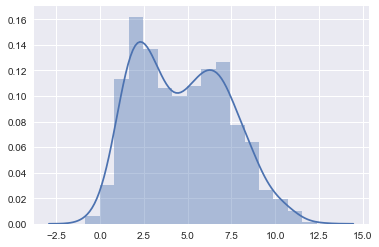

In [112]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
np.random.seed(42)
pi_1 = 0.35
#let us generate 1000 samples, of which 350 will be from first distribution
prob = np.random.uniform(0,1,1000)
#Distribution values
vals = [np.random.normal(loc = 2, scale = 1) if x <= pi_1 else np.random.normal(loc = 6, scale = 2) for x in prob]

sns.distplot(vals)
plt.show()

Now EM tasks is to identify the parameters from where the observed data is coming, well if we know the source or value of the latent variable, cluster number. Nowing this solves our problem easily because now we know which x data points belong to which cluster.
$$\mu_{k} = \frac{\sum x_{i}}{n_{k}} \space ; \space \sigma_{k}^{2} = \frac{\sum (x_{i} - \mu_{k})^2}{n_{k}}$$
But what if i have soft assignments, i.e some distribution on t or my latent variable model
$$\mu_{k} = \frac{\sum_{i} p(t = k|x_{i},\theta)x_{i}}{\sum_{i} p(t = k|x_{i},\theta)} \space ; \space \sigma_{k}^{2} = \frac{\sum_{i}p(t = k|x_{i},\theta)(x_{i} - \mu_{k})^2}{\sum_{i} p(t = k|x_{i},\theta)}$$

so if p(t=1| given observation) = 0.8, then the data point belongs to first gaussian/cluster with chance of 80.

But generally we don't know the sources, so how do we estimate them, if we know the model paramter $\theta$
$$p(t=k|x,\theta) = \frac{p(x|t=k,\theta)p(t=k|\theta)}{Z}$$

This shows that we basically need gaussian paramters to estimate the sources and sources to estimate the gaussian paramters.So EM does the follwing

**Step 1: Initialization step** – Arbitarily choose initial values for the parameter values of our model.
In our case, this is ($\mu_{1}$, $\mu_{2}$), and standard deviation ($\sigma_{1}$, $\sigma_{2}$), and the fraction of values from each distr. ($\pi_{1}$, $\pi_{2}$).

**Step 2: Expectation step** – Based on initialization, determine the distribution for the latent variables.(remember chicken and egg problem)
In our case, for each datapoint, we calculate the likelihood that the value comes from distr 1 or 2.

**Step 3: Maximization step** – Calculate the MLE of the parameter values based on observed values x, we can now do this by not calculating 6 parameters but only on the basis of t

In [117]:
#let's code
import scipy.stats as stats
import math
## set the initial guesses for the distribution parameters
mu_1 = 1
mu_2 = 2
sd_1 = 1
sd_2 = 1

## as well as the latent variable parameters
pi_1 = 0.5
pi_2 = 0.5

for i in np.arange(100):  

    ## Given the observed data, as well as the distribution parameters,
    ## what are the latent variables?

    pi_1_updated = pi_1 * stats.norm(mu_1, sd_1).pdf(vals)
    pi_2_updated = pi_2 * stats.norm(mu_2, sd_2).pdf(vals)

    P_1 = pi_1_updated / (pi_1_updated + pi_2_updated)
    P_2 = 1-P_1

    pi_1 = np.mean(P_1)
    pi_2 = np.mean(P_2)

    ## Given the observed data, as well as the latent variables,
    ## what are the population parameters?

    mu_1 = sum( P_1 * vals ) / sum(P_1)
    mu_2 = sum( P_2 * vals ) / sum(P_2)
    sd_1 = math.sqrt(sum( P_1 *(vals-mu_1)**2)/sum(P_1))
    sd_2 = math.sqrt(sum( P_2 *(vals-mu_2)**2)/sum(P_2))

    ## print the current estimates
    print(mu_1, mu_2, sd_1,sd_2, np.mean(P_1))



1.86851547304 5.25029905256 1.1700958589014638 2.440091153107282 0.163645712751
1.95235889501 5.32145212783 0.9357395529367464 2.4506992741290574 0.185381471022
1.95836568524 5.41427765134 0.8375909262909307 2.4247074931458115 0.20758427589
1.95278222116 5.49531799891 0.7959854551820449 2.392844194378075 0.225384690708
1.94735938431 5.55892254113 0.7817241173679189 2.363544190365214 0.23868830071
1.94469513305 5.60852183687 0.7808693015087375 2.3386138239184526 0.24882103938
1.94498396901 5.64870057119 0.786358453433994 2.3175643893010283 0.256989398788
1.94766168758 5.68283219947 0.7946196826969865 2.2994406401392355 0.263963192045
1.95200803101 5.71300921737 0.8038850060632352 2.2834059124987665 0.270173950685
1.95739071027 5.74045729473 0.8133039906336041 2.2688501276196824 0.275853623803
1.96333804746 5.76588849946 0.8224825821308802 2.2553615395765414 0.28112811247
1.96953215087 5.78972386763 0.8312494816559695 2.2426743173712222 0.286069202892
1.97577438307 5.81222083703 0.839540

isn't this just amazing to see, how we can find the center of two clusters without doing a hard assignment. One thing to note before i leave you with EM, EM suffers from local maxima problem.(exact solution is np hard)

### Generalizing Expectation Maximization
An attempt to apply EM to any likelihood function and not just GMM.

#### Basic Terminilogies
- **Concave Functions**
<img src = './res/06_concave_functions.png'/ width = 500 height = 500>
- **Jensen's Equality** <br>
Using definition of concave function, Jensen's Equality states that:-
$f(\alpha + (1-\alpha)b) >= \alpha f(a) + (1-\alpha)f(b)$ , subject to $\sum_{i}\alpha_{i} = 1\space ; \space \alpha_{i}>=0$

this a,b,c etc. can be different values that "t" can take and alphas can be $\pi$

$ f(E_{p(t)}) >= E_{p(t)}p(t) $ for any concave function f.
- **Kullback- Leiber Divergence**
<img src = './res/07_KL_Div.png' height = 400 weight = 400/> <br>

It has some properties:-
- It is not symmetric
- It is always greater than zero
- The KL divergence of a distribution with itself is zero"

Add handwritten notes here


Resources:- 
https://people.duke.edu/~ccc14/sta-663/EMAlgorithm.html

### Bayesian Linear Regression

Resources :- 
- https://thewinnower.com/papers/278-using-bayes-factors-to-get-the-most-out-of-linear-regression-a-practical-guide-using-r
- https://wiseodd.github.io/
- https://www.statlect.com/fundamentals-of-statistics/normal-distribution-Bayesian-estimation
